TOI Planet Candidates - Spectral Type O: 0.00%
TOI Planet Candidates - Spectral Type B: 0.00%
TOI Planet Candidates - Spectral Type A: 0.56%
TOI Planet Candidates - Spectral Type F: 23.87%
TOI Planet Candidates - Spectral Type G: 44.43%
TOI Planet Candidates - Spectral Type K: 24.30%
TOI Planet Candidates - Spectral Type M: 6.84%
Debug: Hiding X-axis for KOI Planet Candidates
KOI Planet Candidates - Spectral Type O: 0.00%
KOI Planet Candidates - Spectral Type B: 0.02%
KOI Planet Candidates - Spectral Type A: 0.33%
KOI Planet Candidates - Spectral Type F: 24.92%
KOI Planet Candidates - Spectral Type G: 50.56%
KOI Planet Candidates - Spectral Type K: 22.63%
KOI Planet Candidates - Spectral Type M: 1.53%


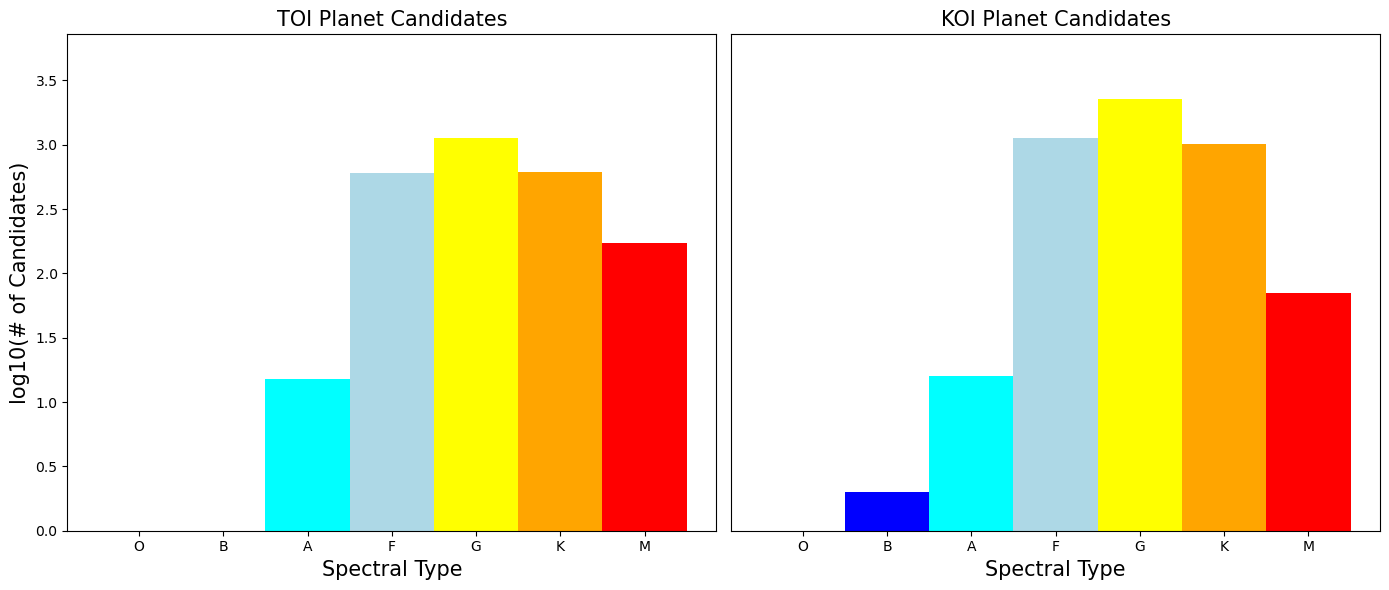

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_spectral_type_distribution(ax, csv_file, title, show_xaxis):
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Define the sequence of spectral types
    spectral_types = ["O", "B", "A", "F", "G", "K", "M"]

    # Count the occurrences of each spectral type
    spectral_counts = df['spectral_type'].value_counts()

    # Ensure all spectral types are present in the counts
    spectral_counts = spectral_counts.reindex(spectral_types, fill_value=0)
    colors = ["purple", "blue", "cyan", "lightblue", "yellow", "orange", "red"]

    # Calculate the percentage of total for each spectral type
    total_count = spectral_counts.sum()
    spectral_percentages = (spectral_counts / total_count) * 100

    # Plot the histogram with log10 y-axis
    ax.bar(spectral_counts.index, np.log10(spectral_counts.values + 1), color=colors, width=1.0)
    ax.set_xlabel('Spectral Type', fontsize=15)
    ax.set_ylabel('log10(# of Candidates)', fontsize=15)
    ax.set_title(title, fontsize=15)

    # Hide X-axis for the right chart
    if show_xaxis == False:
        print(f"Debug: Hiding X-axis for {title}")  # Debugging statement
        ax.set_yticks([])  # Remove X-axis ticks
        ax.set_ylabel('')  # Remove X-axis label

    # Print the percentage of total for each spectral type
    for spectral_type, percentage in spectral_percentages.items():
        print(f"{title} - Spectral Type {spectral_type}: {percentage:.2f}%")

# Create a figure with two subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot TOI data on the left subplot
plot_spectral_type_distribution(
    ax=ax1,
    csv_file='3 TOI_2025.01.10_gaia_3_predicted_multipl_sptype_APCPC+CP+KP.csv',
    title='TOI Planet Candidates',
    show_xaxis=True
)

# Plot KOI data on the right subplot
plot_spectral_type_distribution(
    ax=ax2,
    csv_file='3 KOI_cumulative_2025.01.10_gaia_multpl_sptype_candidate.csv',
    title='KOI Planet Candidates',
    show_xaxis=False
)

# Set the same y-axis scale for both subplots
max_log_count = max(
    np.log10(pd.read_csv('3 TOI_2025.01.10_gaia_3_predicted_multipl_sptype_APCPC+CP+KP.csv')['spectral_type'].value_counts().reindex(["O", "B", "A", "F", "G", "K", "M"], fill_value=0).values + 1).max(),
    np.log10(pd.read_csv('3 KOI_cumulative_2025.01.10_gaia_multpl_sptype_candidate.csv')['spectral_type'].value_counts().reindex(["O", "B", "A", "F", "G", "K", "M"], fill_value=0).values + 1).max()
)
ax1.set_ylim(0, max_log_count + 0.5)  # Add a small buffer for better visualization
ax2.set_ylim(0, max_log_count + 0.5)

# Force update the plot
plt.draw()

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Histogram_of_Spectral_Types_TOI_and_KOI.pdf')
plt.show()

C:\Users\huangm\AppData\Local\Temp\ipykernel_12936\655855037.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if counts[i] > 0:  # Only label bars with data
C:\Users\huangm\AppData\Local\Temp\ipykernel_12936\655855037.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if counts[i] > 0:  # Only label bars with data



TOI Planet Candidates Distribution:
O: 0 (0.0%)
B: 0 (0.0%)
A: 14 (0.6%)
F: 600 (23.9%)
G: 1117 (44.4%)
K: 611 (24.3%)
M: 172 (6.8%)

KOI Planet Candidates Distribution:
O: 0 (0.0%)
B: 1 (0.0%)
A: 15 (0.3%)
F: 1122 (24.9%)
G: 2276 (50.6%)
K: 1019 (22.6%)
M: 69 (1.5%)


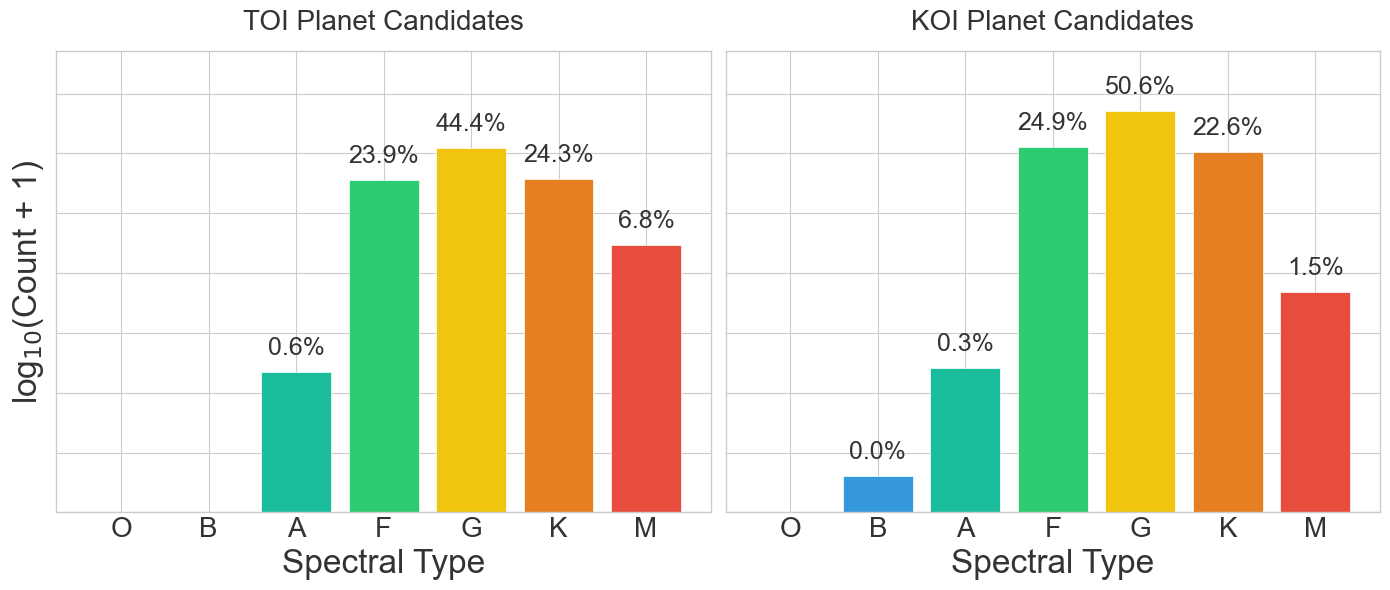

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# ======================
# COMMON STYLING PARAMETERS
# ======================
STYLE = {
    # Font sizes
    'label_fontsize': 24,
    'title_fontsize': 20,
    'tick_fontsize': 20,
    'annotation_fontsize': 18,
    
    # Colors
    'spectral_colors': ["#9b59b6", "#3498db", "#1abc9c", 
                       "#2ecc71", "#f1c40f", "#e67e22", "#e74c3c"],
    'text_color': '#333333',
    
    # Figure settings
    'figsize': (14, 6),
    'dpi': 300,
    'bar_width': 0.8,
    'y_padding': 0.5
}

# Apply global style settings
plt.style.use('seaborn-v0_8-whitegrid')
rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans'],
    'text.color': STYLE['text_color'],
    'axes.labelcolor': STYLE['text_color'],
    'xtick.color': STYLE['text_color'],
    'ytick.color': STYLE['text_color'],
})

# ======================
# PLOTTING FUNCTION
# ======================
def plot_spectral_type_distribution(ax, csv_file, title, show_yaxis=True):
    """Plot spectral type distribution with consistent styling.
    
    Parameters:
        ax (matplotlib.axes.Axes): Axes object to plot on
        csv_file (str): Path to CSV file containing data
        title (str): Plot title
        show_yaxis (bool): Whether to show y-axis labels and ticks
    """
    # Load and prepare data
    df = pd.read_csv(csv_file)
    spectral_types = ["O", "B", "A", "F", "G", "K", "M"]
    
    # Count and normalize data
    counts = df['spectral_type'].value_counts().reindex(spectral_types, fill_value=0)
    log_counts = np.log10(counts + 1)  # Add 1 to avoid log(0)
    percentages = (counts / counts.sum()) * 100
    
    # Create bar plot
    bars = ax.bar(spectral_types, log_counts, 
                 color=STYLE['spectral_colors'], 
                 width=STYLE['bar_width'],
                 edgecolor='white',
                 linewidth=0.5)
    
    # Add percentage annotations
    for i, (log_val, pct) in enumerate(zip(log_counts, percentages)):
        if counts[i] > 0:  # Only label bars with data
            ax.text(i, log_val + 0.1, f"{pct:.1f}%", 
                   ha='center', va='bottom', 
                   fontsize=STYLE['annotation_fontsize'])
    
    # Configure axes
    ax.set_title(title, fontsize=STYLE['title_fontsize'], pad=15)
    ax.set_xlabel('Spectral Type', fontsize=STYLE['label_fontsize'])
    
    if show_yaxis:
        ax.set_ylabel('log$_{10}$(Count + 1)', fontsize=STYLE['label_fontsize'])
    else:
        ax.set_ylabel('')
        ax.set_yticklabels([])
    
    # Format ticks
    ax.tick_params(axis='both', which='major', labelsize=STYLE['tick_fontsize'])
    
    # Print summary statistics
    print(f"\n{title} Distribution:")
    for stype, count, pct in zip(spectral_types, counts, percentages):
        print(f"{stype}: {count} ({pct:.1f}%)")

# ======================
# MAIN PLOTTING ROUTINE
# ======================
def main():
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=STYLE['figsize'], sharey=True)
    
    # Plot TOI data
    plot_spectral_type_distribution(
        ax1,
        '3 TOI_2025.01.10_gaia_3_predicted_multipl_sptype_APCPC+CP+KP.csv',
        'TOI Planet Candidates'
    )
    
    # Plot KOI data
    plot_spectral_type_distribution(
        ax2,
        '3 KOI_cumulative_2025.01.10_gaia_multpl_sptype_candidate.csv',
        'KOI Planet Candidates',
        show_yaxis=False
    )
    
    # Set consistent y-axis limits
    def get_max_log_count(file):
        df = pd.read_csv(file)
        counts = df['spectral_type'].value_counts().reindex(["O", "B", "A", "F", "G", "K", "M"], fill_value=0)
        return np.log10(counts + 1).max()
    
    max_log_count = max(
        get_max_log_count('3 TOI_2025.01.10_gaia_3_predicted_multipl_sptype_APCPC+CP+KP.csv'),
        get_max_log_count('3 KOI_cumulative_2025.01.10_gaia_multpl_sptype_candidate.csv')
    )
    
    ax1.set_ylim(0, max_log_count + STYLE['y_padding'])
    
    # Final adjustments
    plt.tight_layout()
    plt.savefig('Spectral_Type_Distribution_TOI_KOI.pdf', 
                dpi=STYLE['dpi'], 
                bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    main()